In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def addLinPower(df):
    df['Raw Power (mW)'] = 10**(df['Raw Power (dBm)']/10)
    return df

In [28]:
dipole = pd.read_pickle('rawData/2021-12-31_16-44-00_banannaDipTG_biconSA.pkl')
term_open = pd.read_pickle('rawData/2021-12-31_16-45-42_roomCableToOpenTermTG_biconSA.pkl')
term_50Ohm = pd.read_pickle('rawData/2021-12-31_17-00-10_roomCableTo50OhmTermTG_biconSA.pkl')
term_75Ohm = pd.read_pickle('rawData/2021-12-31_17-01-01_roomCableTo75OhmTermTG_biconSA.pkl')
term_93Ohm = pd.read_pickle('rawData/2021-12-31_17-01-48_roomCableTo93OhmTermTG_biconSA.pkl')
outsideCables_50Ohm = pd.read_pickle('rawData/2021-12-31_16-38-26_pannelTo50OhmTermTG_pannelTo50OhmTermSA.pkl')
outsideCables_open = pd.read_pickle('rawData/2021-12-31_16-39-20_pannelToOpenTermTG_pannelTo50OhmTermSA.pkl')
parallelCables_50Ohm = pd.read_pickle('rawData/2021-12-31_16-30-23_termCable50OhmTG_termCable50OhmSA_parallel.pkl')
parallelCables_open = pd.read_pickle('rawData/2021-12-31_16-31-21_termCableOpenTG_termCable50OhmSA_parallel.pkl')
parallelCables_75Ohm = pd.read_pickle('rawData/2021-12-31_16-32-02_termCable75OhmTG_termCable50OhmSA_parallel.pkl')
parallelCables_93Ohm = pd.read_pickle('rawData/2021-12-31_16-33-44_termCable93OhmTG_termCable50OhmSA_parallel.pkl')

addLinPower(term_open)
addLinPower(term_50Ohm)
addLinPower(term_75Ohm)
addLinPower(term_93Ohm)
addLinPower(outsideCables_50Ohm)
addLinPower(outsideCables_open)

;

''

# Test outside cables effects to make sure reflected power is not an issue outside

Signal flow:
Tracking generator to panel to terminator (50 Ohm or open), SA listening to 50 Ohm terminator through patch panel via cables used in the rest of the tests. 

Cables were taped and didn't move through all data taken today.

All cables RG58 (except potentially bicon to panel)

No attenuation, RF pre on = -118 DANL

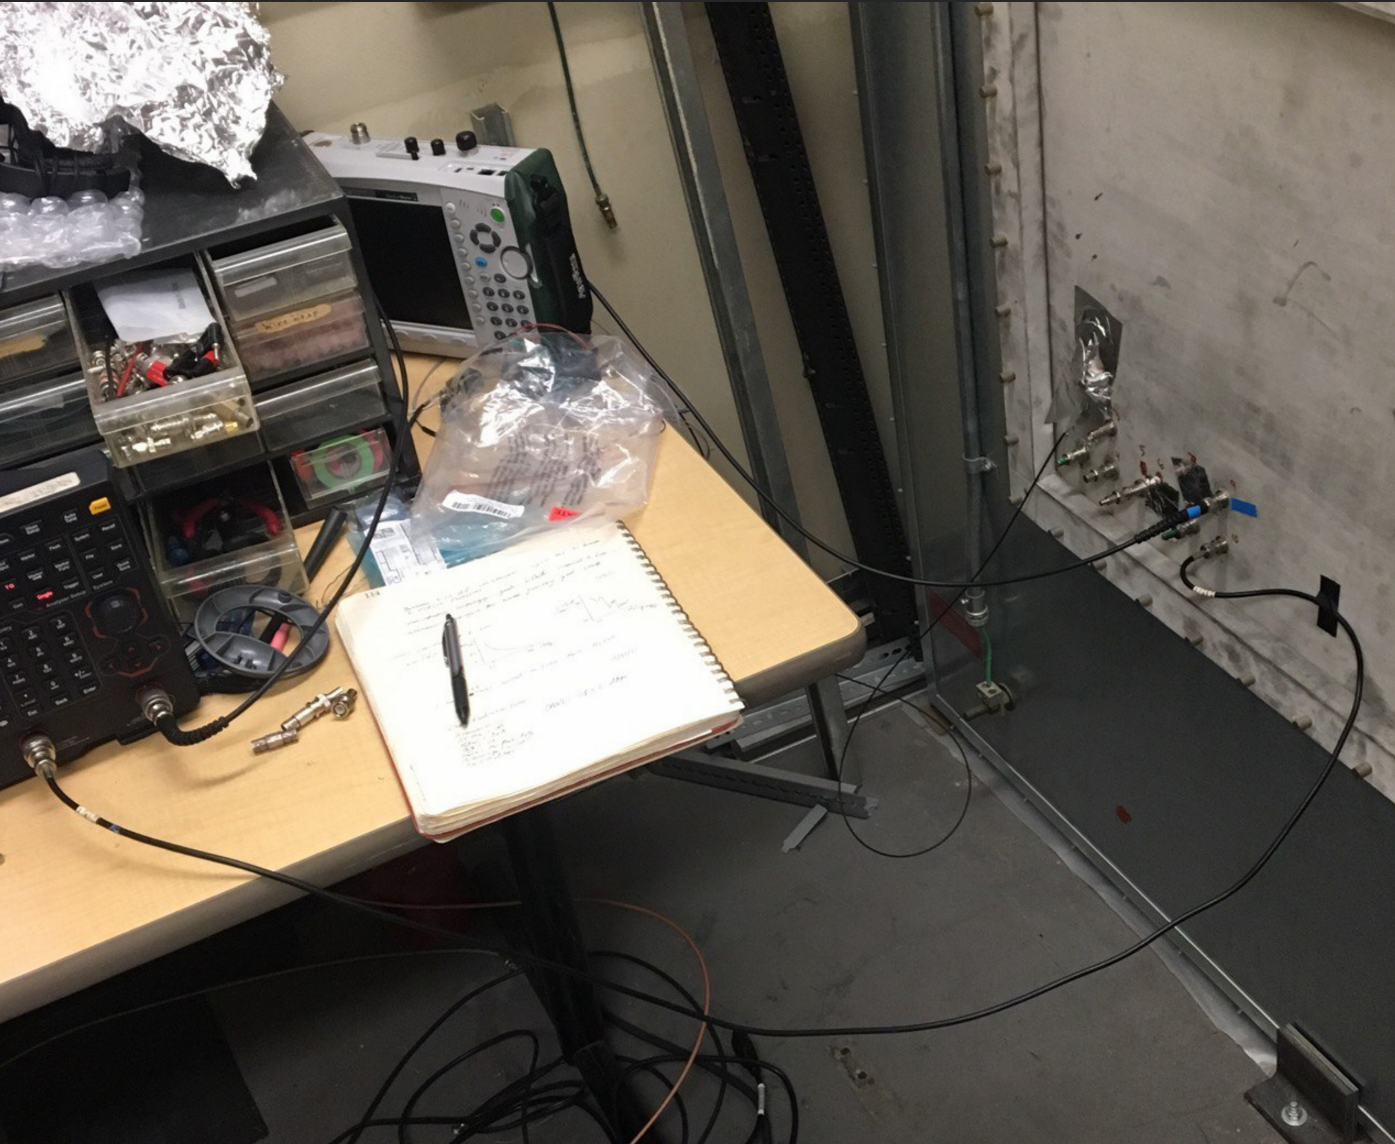

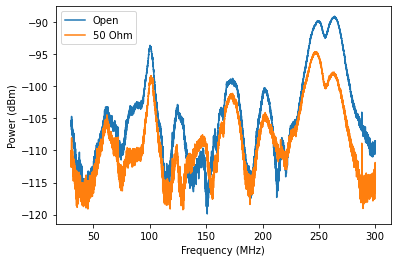

In [29]:
%matplotlib inline
plt.title('')
plt.plot(dipole['Frequency (MHz)'], outsideCables_open['Raw Power (dBm)'], label = 'Open')
plt.plot(term_open['Frequency (MHz)'], outsideCables_50Ohm['Raw Power (dBm)'], label = '50 Ohm')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)');

I also tested parallel for the hell of it. Note SA cables always terminated at 50 Ohms

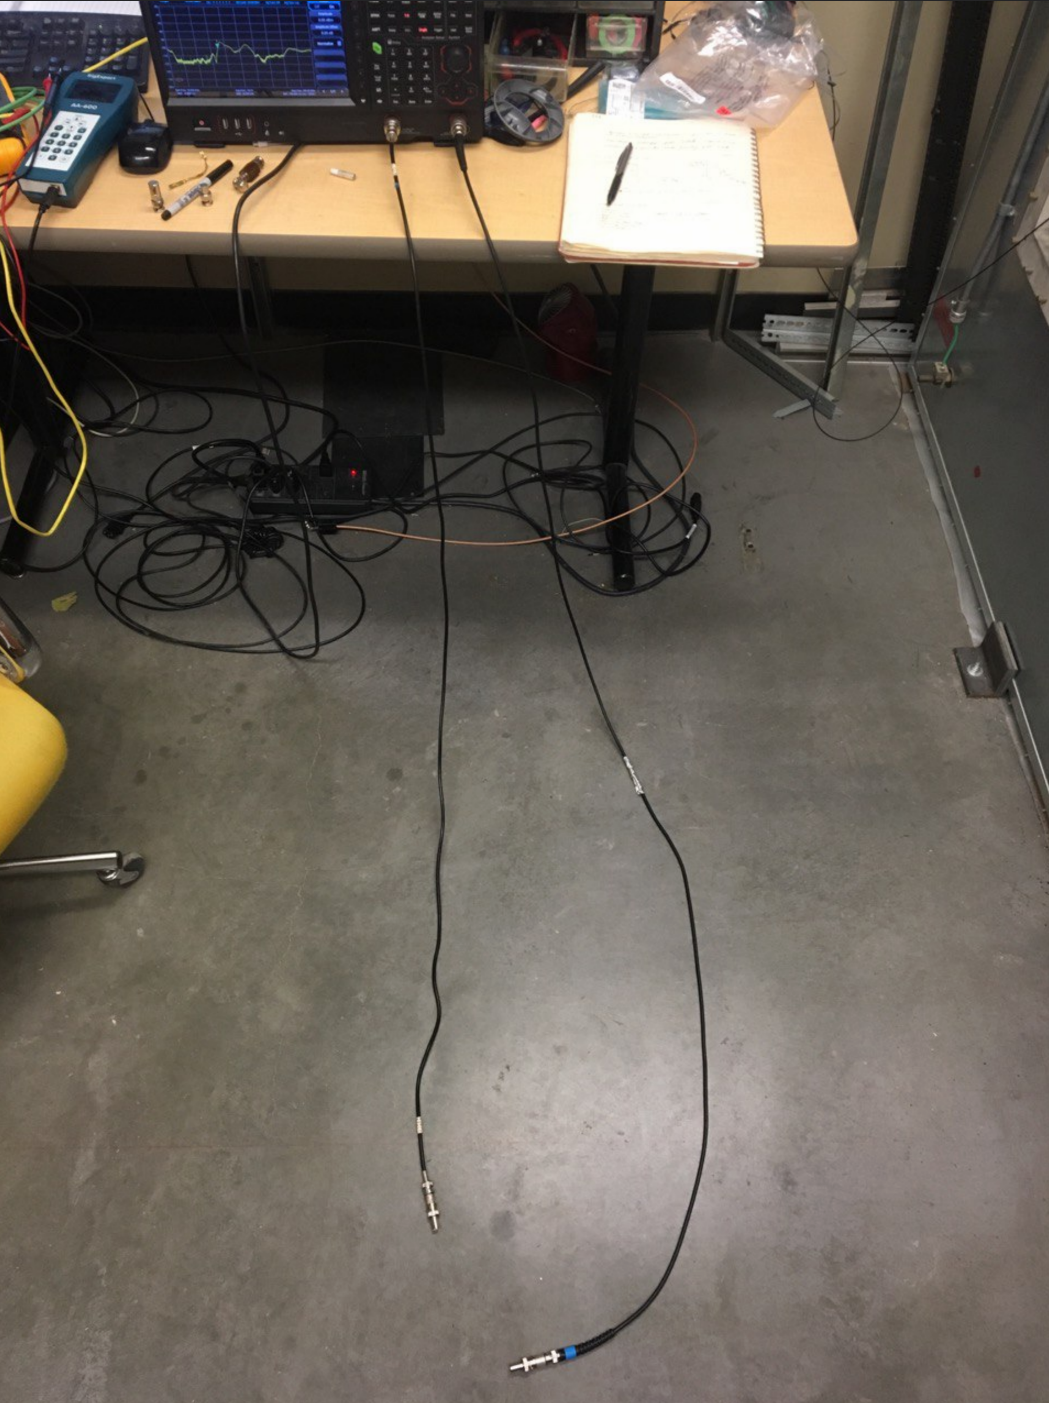

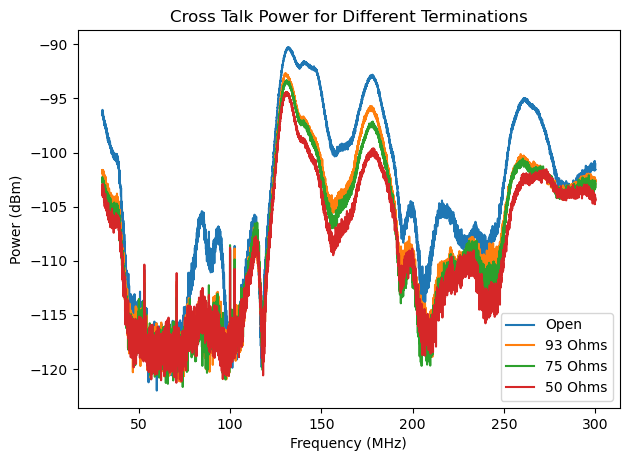

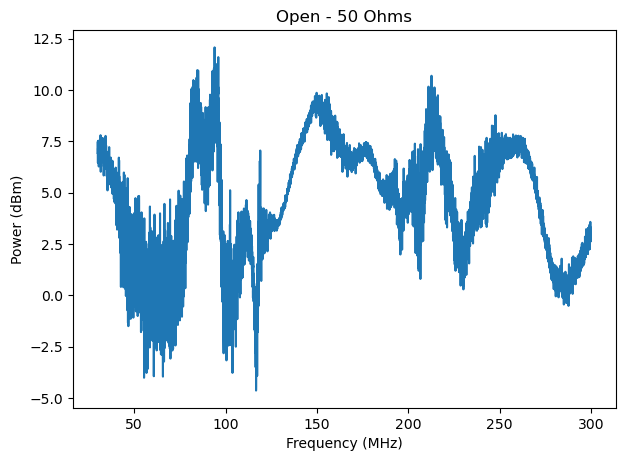

In [54]:
%matplotlib inline

plt.figure(figsize = (7,5), dpi = 100)
plt.title('Cross Talk Power for Different Terminations')

plt.plot(dipole['Frequency (MHz)'], parallelCables_open['Raw Power (dBm)'], label = 'Open')
plt.plot(dipole['Frequency (MHz)'], parallelCables_93Ohm['Raw Power (dBm)'], label = '93 Ohms')
plt.plot(dipole['Frequency (MHz)'], parallelCables_75Ohm['Raw Power (dBm)'], label = '75 Ohms')
plt.plot(dipole['Frequency (MHz)'], parallelCables_50Ohm['Raw Power (dBm)'], label = '50 Ohms')


plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')



plt.figure(figsize = (7,5), dpi = 100)
plt.title('Open - 50 Ohms')

plt.plot(dipole['Frequency (MHz)'], parallelCables_open['Raw Power (dBm)'] - parallelCables_50Ohm['Raw Power (dBm)'], label = 'Open')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)');

# Test Differences Between Banana Dipole and Different Terminators  

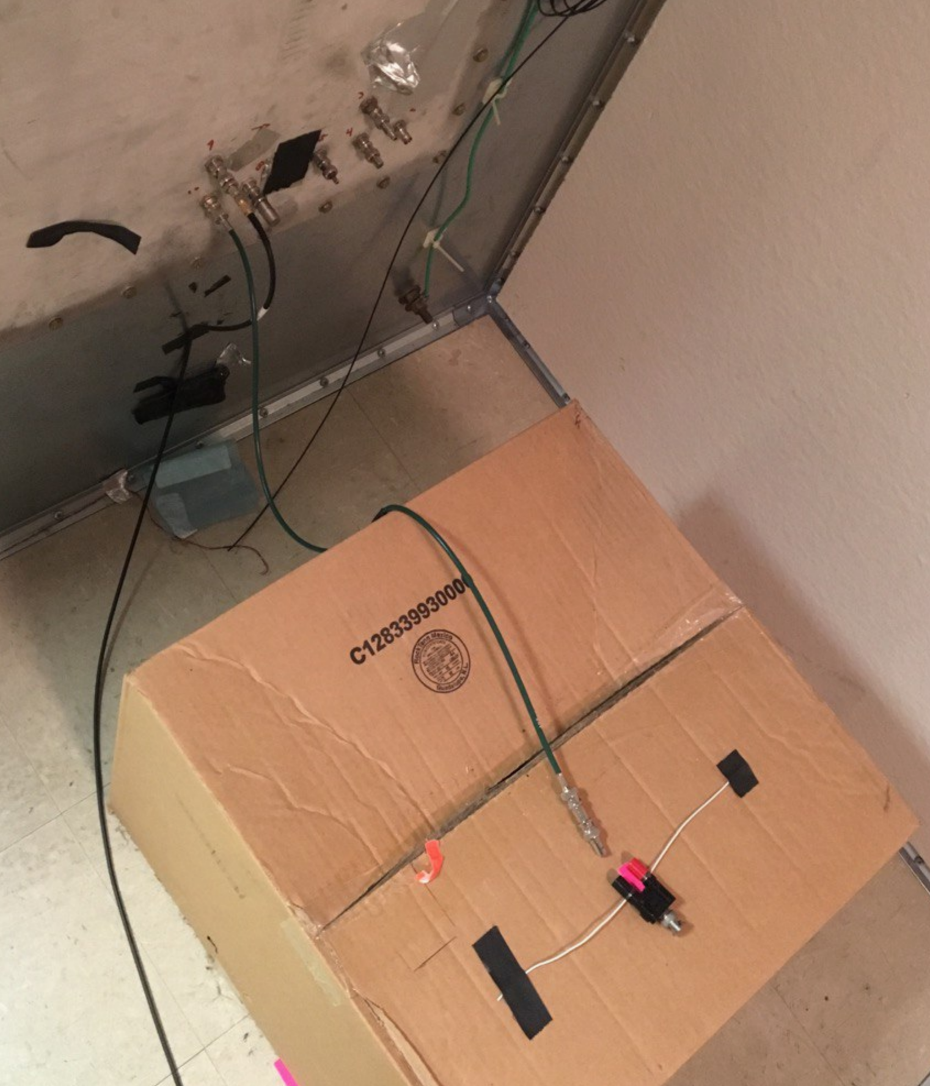

Look at different terminators first


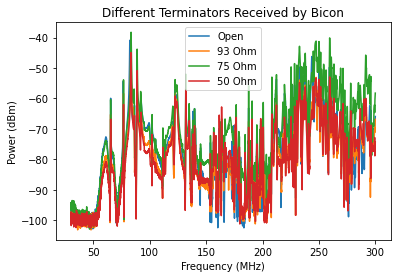

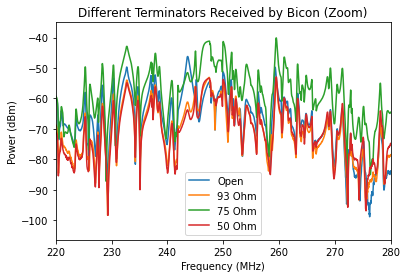

In [46]:
%matplotlib inline
plt.figure()
plt.title('Different Terminators Received by Bicon')
plt.plot(term_open['Frequency (MHz)'], term_open['Raw Power (dBm)'], label = 'Open')
plt.plot(term_93Ohm['Frequency (MHz)'], term_93Ohm['Raw Power (dBm)'], label = '93 Ohm')
plt.plot(term_75Ohm['Frequency (MHz)'], term_75Ohm['Raw Power (dBm)'], label = '75 Ohm')
plt.plot(term_50Ohm['Frequency (MHz)'], term_50Ohm['Raw Power (dBm)'], label = '50 Ohm')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')

plt.figure()
plt.title('Different Terminators Received by Bicon (Zoom)')
plt.plot(term_open['Frequency (MHz)'], term_open['Raw Power (dBm)'], label = 'Open')
plt.plot(term_93Ohm['Frequency (MHz)'], term_93Ohm['Raw Power (dBm)'], label = '93 Ohm')
plt.plot(term_75Ohm['Frequency (MHz)'], term_75Ohm['Raw Power (dBm)'], label = '75 Ohm')
plt.plot(term_50Ohm['Frequency (MHz)'], term_50Ohm['Raw Power (dBm)'], label = '50 Ohm')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')
plt.xlim(220,280)

print('Look at different terminators first')

''

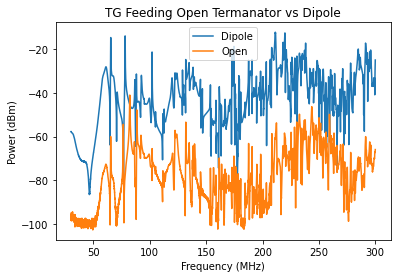

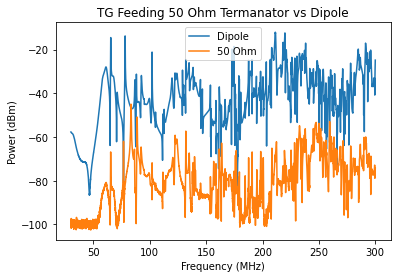

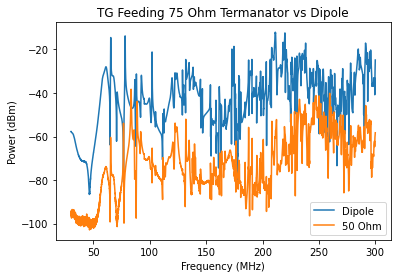

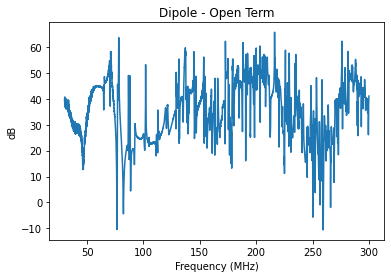

In [47]:
%matplotlib inline
plt.title('TG Feeding Open Termanator vs Dipole')
plt.plot(dipole['Frequency (MHz)'], dipole['Raw Power (dBm)'], label = 'Dipole')
plt.plot(term_open['Frequency (MHz)'], term_open['Raw Power (dBm)'], label = 'Open')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')

plt.figure()
plt.title('TG Feeding 50 Ohm Termanator vs Dipole')
plt.plot(dipole['Frequency (MHz)'], dipole['Raw Power (dBm)'], label = 'Dipole')
plt.plot(term_50Ohm['Frequency (MHz)'], term_50Ohm['Raw Power (dBm)'], label = '50 Ohm')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')

plt.figure()
plt.title('TG Feeding 75 Ohm Termanator vs Dipole')
plt.plot(dipole['Frequency (MHz)'], dipole['Raw Power (dBm)'], label = 'Dipole')
plt.plot(term_50Ohm['Frequency (MHz)'], term_75Ohm['Raw Power (dBm)'], label = '50 Ohm')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')


plt.figure()
plt.title('Dipole - Open Term')
plt.plot(dipole['Frequency (MHz)'], dipole['Raw Power (dBm)'] - term_open['Raw Power (dBm)'])
plt.xlabel('Frequency (MHz)')
plt.ylabel('dB')

;

/Users/joseph/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


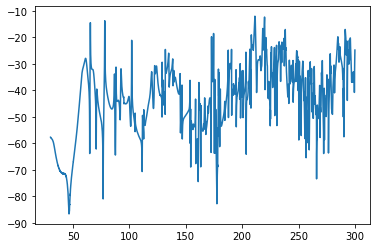

In [59]:
#convert to linear
%matplotlib inline
withDipole['Raw Power (mW)'] = withDipole['Raw Power (dBm)']
term['Raw Power (mW)'] = term_open['Raw Power (mW)']
plt.plot(withDipole['Frequency (MHz)'], withDipole['Raw Power (dBm)'], label = 'dipole')
plt.plot(withDipole['Frequency (MHz)'], 10*np.log10(dipole['Raw Power (mW)'] - term['Raw Power (mW)']))


KeyError: 'Raw Power (mW)'

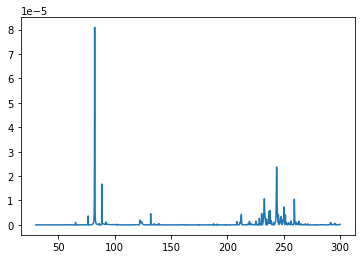

In [64]:
%matplotlib inline
plt.plot(term['Frequency (MHz)'], term_open['Raw Power (mW)'], label = 'terminator')
plt.plot(dipole['Frequency (MHz)'], dipole['Raw Power (mW)'], label = 'dipole')
plt.legend()